In [1]:
# from pyDWSIMconnect import PyDWSIMconnect
from simulation import Simulation
import numpy as np
import time
from fobj import *
from scipy import optimize
from pprint import pprint

In [2]:
# Loading DWSIM simulation into Python (Simulation object)
sim_smr = Simulation(path2sim="C:\\Users\\lfsfr\\Desktop\\pyDWSIMopt\\sim\\SMR_2exp_phaseSep_MSHE_MITApy.dwxmz")
sim_smr.savepath = "C:\\Users\\lfsfr\\Desktop\\pyDWSIMopt\\sim\\SMR_2exp_phaseSep_MSHE_MITApy2.dwxmz"
sim_smr.Add_refs()
sim_smr.Connect()

added refs
Simulation was loaded successfully


In [59]:
def fobj8n_2exp(sim_smr, x):
    mr1 = sim_smr.flowsheet.GetFlowsheetSimulationObject("MR-1")
    comp1 = sim_smr.flowsheet.GetFlowsheetSimulationObject("COMP-1") 
    comp2 = sim_smr.flowsheet.GetFlowsheetSimulationObject("COMP-2") 
    comp3 = sim_smr.flowsheet.GetFlowsheetSimulationObject("COMP-3") 
    comp4 = sim_smr.flowsheet.GetFlowsheetSimulationObject("COMP-4") 
    pump1 = sim_smr.flowsheet.GetFlowsheetSimulationObject("PUMP-01") 
    pump2 = sim_smr.flowsheet.GetFlowsheetSimulationObject("PUMP-02") 
    vlv1 = sim_smr.flowsheet.GetFlowsheetSimulationObject("VALV-01")
    cool8 = sim_smr.flowsheet.GetFlowsheetSimulationObject("COOL-08")
    lng = sim_smr.flowsheet.GetFlowsheetSimulationObject("LNG-1")
    if sim_smr.x is None:
        sim_smr.x = np.zeros(len(x))
    if np.linalg.norm(sim_smr.x - np.asarray(x))>1e-10:
        sep1 = sim_smr.flowsheet.GetFlowsheetSimulationObject("SEP-02")
        sep2 = sim_smr.flowsheet.GetFlowsheetSimulationObject("SEP-03")
        sep1.GraphicObject.Activate = False
        sep2.GraphicObject.Activate = False

        mr1.SetOverallCompoundMassFlow(0,x[1])
        mr1.SetOverallCompoundMassFlow(1,x[2])
        mr1.SetOverallCompoundMassFlow(2,x[3])
        mr1.SetOverallCompoundMassFlow(5,x[4])
        mr1.SetOverallCompoundMassFlow(7,x[0])
        vlv1.OutletPressure = x[5]
        comp4.POut = x[6]
        cool8.OutletTemperature = x[7]

        sim_smr.interface.CalculateFlowsheet2(sim_smr.flowsheet)
        if sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-03").Phases[1].Properties.massfraction < 1e-5:
            pump1.GraphicObject.Active = False
            # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("PUMP-01").GraphicObject.Active)
            sim_smr.flowsheet.DisconnectObjects(
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-29").GraphicObject,
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MIX-02").GraphicObject)
        else:
            pump1.GraphicObject.Active = True
            sim_smr.flowsheet.DisconnectObjects(
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-29").GraphicObject,
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MIX-02").GraphicObject)     #avoid bug
            sim_smr.flowsheet.ConnectObjects(
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-29").GraphicObject,
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MIX-02").GraphicObject,-1,-1)
        sep1.GraphicObject.Active = True
        sep1.Calculate()
        sim_smr.interface.CalculateFlowsheet2(sim_smr.flowsheet)
        if sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-05").Phases[1].Properties.massfraction < 1e-5:
            pump2.GraphicObject.Active = False
            sim_smr.flowsheet.DisconnectObjects(
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-30").GraphicObject,
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MIX-02").GraphicObject)
        else:
            pump2.GraphicObject.Active = True
            pump2.Calculate()
            sim_smr.flowsheet.DisconnectObjects(
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-30").GraphicObject,
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MIX-02").GraphicObject)
            sim_smr.flowsheet.ConnectObjects(
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-30").GraphicObject,
                sim_smr.flowsheet.GetFlowsheetSimulationObject("MIX-02").GraphicObject,-1,-1)
        sep2.GraphicObject.Active = True
        sep2.Calculate()
        sim_smr.interface.CalculateFlowsheet2(sim_smr.flowsheet)
        # print(comp1.DeltaQ + comp2.DeltaQ + comp3.DeltaQ + comp4.DeltaQ)
        # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables['mita'])
        # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA2-Calc").OutputVariables['mita'])
        # time.sleep(0.05)
        # sim_smr.interface.CalculateFlowsheet2(sim_smr.flowsheet)
        # time.sleep(0.05)
        # print(comp1.DeltaQ + comp2.DeltaQ + comp3.DeltaQ + comp4.DeltaQ)
        # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables['mita'])
        # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA2-Calc").OutputVariables['mita'])
        # sim_smr.interface.CalculateFlowsheet2(sim_smr.flowsheet)
        # time.sleep(0.05)
        # print(comp1.DeltaQ + comp2.DeltaQ + comp3.DeltaQ + comp4.DeltaQ)
        # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables['mita'])
        # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA2-Calc").OutputVariables['mita'])
        # sim_smr.interface.CalculateFlowsheet2(sim_smr.flowsheet)
        # print(comp1.DeltaQ + comp2.DeltaQ + comp3.DeltaQ + comp4.DeltaQ)
        # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables['mita'])
        # print(sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA2-Calc").OutputVariables['mita'])
        sumW = (comp1.DeltaQ + comp2.DeltaQ + comp3.DeltaQ + comp4.DeltaQ)
        if sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-03").Phases[1].Properties.massfraction > 1e-5:
            sumW += pump1.DeltaQ 
        if sim_smr.flowsheet.GetFlowsheetSimulationObject("MSTR-05").Phases[1].Properties.massfraction > 1e-5:    
            sumW += pump2.DeltaQ
        sumW = sumW/lng.GetMassFlow()/3600
        mita1 = sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables['mita']
        mita2 = sim_smr.flowsheet.GetFlowsheetSimulationObject("MITA2-Calc").OutputVariables['mita']
    else:
        sumW = sim_smr.f
        mita1 = sim_smr.g
        mita2 = sim_smr.g
    sim_smr.x = x
    sim_smr.f = sumW
    sim_smr.g = min(mita1, mita2)
    return sumW, min(mita1, mita2)

In [61]:
print(fobj8n_2exp(sim_smr,x0))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet,sim_smr.savepath,True)

(0.38910372777457003, 6.478475991470418)
True


In [31]:
# Initial simulation setup
x0 = np.array( [0.25/3600, 0.70/3600, 1.0/3600, 1.10/3600, 1.80/3600, 2.50e5, 50.00e5, -60+273.15] )
x_top = np.array( [0.252779/3600, 0.441063/3600, 1.411068/3600, 0.805952/3600, 1.851257/3600, 3.342832e5, 34.97221e5, -27.2958+273.15] )
sim_smr.fobj = lambda x: fobj8n_2exp(sim_smr, x)
sumW, mita = sim_smr.fobj(1.0*x0)
print(sim_smr.x,
sim_smr.f,
sim_smr.g)
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet,sim_smr.savepath,True)

[6.94444444e-05 1.94444444e-04 2.77777778e-04 3.05555556e-04
 5.00000000e-04 2.50000000e+05 5.00000000e+06 2.33150000e+02] 0.3891037277745704 6.47847599147029


In [32]:
args=(sim_smr)
xtol=0.01
ftol=0.01
maxiter=50 # +- 5 seconds per iteration
print("starting optimization")
iteration = 0
regularizer = np.array([1e4,1e4,1e4,1e4,1e4, 1e-5, 1e-6, 1e-2])
#rever \/
bounds_raw = np.array( [0.6*np.asarray(x0), 1.4*np.asarray(x0)] )
bounds_raw[0][-1] = 153
bounds_raw[1][-1] = 233
bounds_reg = regularizer*bounds_raw
print(bounds_reg)
bounds = optimize.Bounds(bounds_reg[0], bounds_reg[1])
g = lambda x: fobj8n_2exp(sim_smr,np.asarray(x)/regularizer)[1]
nonlinear_constraint = optimize.NonlinearConstraint(g, 3, np.inf, jac='2-point', hess=optimize.BFGS())
f = lambda x: fobj8n_2exp(sim_smr,np.asarray(x)/regularizer)[0]
# print(fobj8n_2exp(sim_smr,x_top))

starting optimization
[[0.41666667 1.16666667 1.66666667 1.83333333 3.         1.5
  3.         1.53      ]
 [0.97222222 2.72222222 3.88888889 4.27777778 7.         3.5
  7.         2.33      ]]


In [42]:
fobj8n_2exp(sim_smr, x_top)
pprint(vars(sim_smr))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)

{'f': nan,
 'flowsheet': <DWSIM.UI.Desktop.Shared.Flowsheet object at 0x0000022A4953F4F0>,
 'fobj': <function <lambda> at 0x0000022A49562CA0>,
 'g': 3.3707080862848784,
 'interface': <DWSIM.Automation.Automation2 object at 0x0000022A495399D0>,
 'path': 'C:\\Users\\lfsfr\\Desktop\\pyDWSIMopt\\sim\\SMR_2exp_phaseSep_MSHE_MITApy.dwxmz',
 'path2dwsim': 'C:\\Users\\lfsfr\\AppData\\Local\\DWSIM7\\',
 'savepath': 'C:\\Users\\lfsfr\\Desktop\\pyDWSIMopt\\sim\\SMR_2exp_phaseSep_MSHE_MITApy2.dwxmz',
 'x': array([7.02163889e-05, 1.22517500e-04, 3.91963333e-04, 2.23875556e-04,
       5.14238056e-04, 3.34283200e+05, 3.49722100e+06, 2.45854200e+02])}


In [14]:
# Local optimization with trust-region -> working to some extent
result = optimize.minimize( f, np.asarray(x0)*regularizer, 
            method='trust-constr', jac='2-point', hess=optimize.BFGS(),
            constraints=[nonlinear_constraint], bounds=bounds, callback=None,
            options={'verbose': 3, 
                     'xtol': xtol, 
                     'maxiter': 0.1*maxiter, 
                     'finite_diff_rel_step': None, 
                     'initial_tr_radius': 0.1} )

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------------|-------|
|   1   |   9   |   0   | +3.8910e-01 | 1.00e-01 | 1.43e-02 | 1.50e-03 | 1.00e+00 |  1.00e-01   |   0   |
|   2   |  18   |   1   | +3.8910e-01 | 1.00e-02 | 1.43e-02 | 1.50e-03 | 1.00e+00 |  1.00e-01   |   4   |
|   3   |  27   |   4   | +3.8910e-01 | 6.47e-02 | 1.43e-02 | 1.50e-03 | 1.00e+00 |  1.00e-01   |   4   |
|   4   |  36   |   7   | +3.8910e-01 | 4.19e-01 | 1.42e-02 | 1.50e-03 | 1.00e+00 |  1.00e-01   |   4   |
|   5   |  45   |  12   | +3.8910e-01 | 4.19e-02 | 1.42e-02 | 1.50e-03 | 1.00e+00 |  1.00e-01   |   4   |

The maximum number of function evaluations is exceeded.
Number of iterations: 5, function evaluations: 45, CG iterations: 12, optimality: 1.42e-02, constraint violation: 1.50e-03, execution time: 1e+02 s.


In [34]:
print(f(result.x))
print(g(result.x))
# sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)
print(result.x)
# x_top
bounds

NameError: name 'result' is not defined

In [21]:
# Global optimization with Differential Evolution
result = optimize.differential_evolution(f, bounds, constraints=[nonlinear_constraint], 
            maxiter=40, popsize=1, seed=420, disp=True, polish=False)

differential_evolution step 1: f(x)= 0.389021
differential_evolution step 2: f(x)= 0.389021
differential_evolution step 3: f(x)= 0.389021
differential_evolution step 4: f(x)= 0.389021
differential_evolution step 5: f(x)= 0.388951
differential_evolution step 6: f(x)= 0.381795
differential_evolution step 7: f(x)= 0.375185
differential_evolution step 8: f(x)= 0.375185
differential_evolution step 9: f(x)= 0.375185
differential_evolution step 10: f(x)= 0.375185
differential_evolution step 11: f(x)= 0.375185
differential_evolution step 12: f(x)= 0.370525
differential_evolution step 13: f(x)= 0.35592
differential_evolution step 14: f(x)= 0.35592
differential_evolution step 15: f(x)= 0.352001
differential_evolution step 16: f(x)= 0.352001
differential_evolution step 17: f(x)= 0.352001
differential_evolution step 18: f(x)= 0.352001
differential_evolution step 19: f(x)= 0.352001
differential_evolution step 20: f(x)= 0.352001
differential_evolution step 21: f(x)= 0.352001
differential_evolution s

In [22]:
print(f(result.x))
print(g(result.x))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)
print(result.x)
pprint(result)

0.35200079115517074
3.452329610257806
[0.65241246 2.15011408 3.22390549 2.81997067 5.23753216 3.39148359
 4.38820831 1.9372737 ]
{'constr': [array([0.])],
 'constr_violation': 0.0,
 'fun': 0.35200079115517074,
 'maxcv': 0.0,
 'message': 'Optimization terminated successfully.',
 'nfev': 84,
 'nit': 24,
 'success': True,
 'x': array([0.65241246, 2.15011408, 3.22390549, 2.81997067, 5.23753216,
       3.39148359, 4.38820831, 1.9372737 ])}


In [65]:
# Global optimization with PSO
from sko.PSO import PSO
fpen = lambda x: f(x)+1000*max(0,3-g(x))
result_pso = PSO(func=fpen, n_dim=8, pop=20, max_iter=50, lb=bounds_reg[0], ub=bounds_reg[1], verbose=True)
result_pso.record_mode = True
result_pso.run()

Iter: 0, Best fit: [0.40724619] at [0.84994424 1.74506097 3.88888889 3.18785641 5.11879347 3.11567772
 7.         2.33      ]
Iter: 1, Best fit: [0.39306125] at [0.50607896 1.16666667 3.33035558 3.64406154 7.         1.5
 3.         1.90512088]
Iter: 2, Best fit: [0.39306125] at [0.50607896 1.16666667 3.33035558 3.64406154 7.         1.5
 3.         1.90512088]
Iter: 3, Best fit: [0.37634747] at [0.41666667 1.16666667 3.88888889 2.10208541 5.65431243 1.5
 3.         2.05343288]
Iter: 4, Best fit: [0.32658729] at [0.41666667 1.16666667 3.88888889 1.83333333 6.9182761  2.01834488
 3.         2.19214542]
Iter: 5, Best fit: [0.32658729] at [0.41666667 1.16666667 3.88888889 1.83333333 6.9182761  2.01834488
 3.         2.19214542]
Iter: 6, Best fit: [0.32658729] at [0.41666667 1.16666667 3.88888889 1.83333333 6.9182761  2.01834488
 3.         2.19214542]
Iter: 7, Best fit: [0.31564364] at [0.41666667 1.16666667 3.88888889 1.83333333 6.96111813 2.16750799
 3.         2.24418207]
Iter: 8, Best

(array([0.41666667, 1.16666667, 3.88888889, 1.83333333, 6.7898326 ,
        2.38250137, 3.09541658, 2.33      ]),
 array([0.30338076]))

0.30338076019866816
3.000982335971088
[0.41666667 1.16666667 3.88888889 1.83333333 6.7898326  2.38250137
 3.09541658 2.33      ]
0.30338076019866816


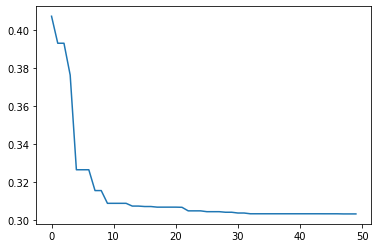

In [66]:
import matplotlib.pyplot as plt

print(f(result_pso.gbest_x))
print(g(result_pso.gbest_x))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)
print(result_pso.gbest_x)
pprint(result_pso)
print(fpen(result_pso.gbest_x))

plt.plot(result_pso.gbest_y_hist)
plt.show()

In [ ]:
import jsons

json_result = jsons.dumps(result_pso)
print(json_result)


Error: Kernel is dead